# Air BnB prices in NYC

This is an exploratory analysis of AirBnb prices within New York City. Specifically if there is a pattern in pricing of listings.

Given the time frame constraint, I decided to focus on large scale conclusions from the data. Given more time, I would have worked at the sub borough level, and taken a closer look at the relationship between price, and number of reviews

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#data is downloaded from kaggle. Updated as of 09/30/2020
bnb_df = pd.read_csv('AB_NYC_2019.csv')

# Exploratory Analysis of Data

In [3]:
print('(rows, columns):' + ' ' + str(bnb_df.shape))

(rows, columns): (48895, 16)


In [4]:
bnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [5]:
bnb_df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# High Level statistics and Visualizations

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


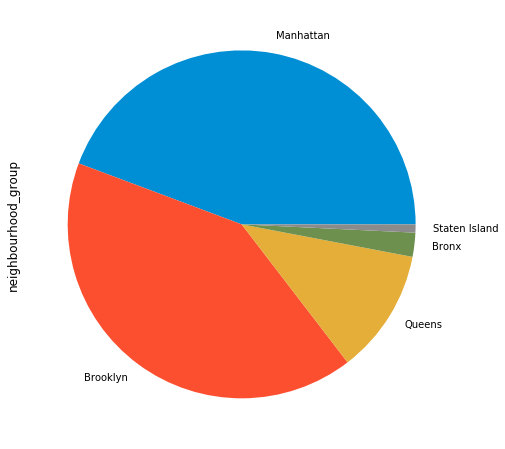

In [6]:
# number of listings by neighboorhood group
print(bnb_df['neighbourhood_group'].value_counts())
bnb_df['neighbourhood_group'].value_counts().plot(kind='pie', figsize = (8, 8))

plt.show()

Avg price/night NYC:$152.72


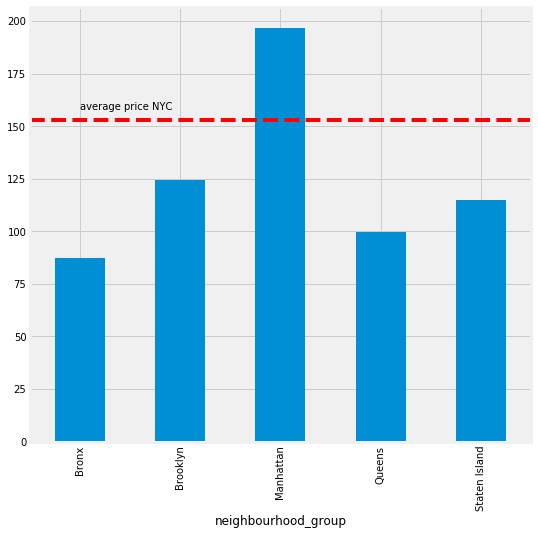

In [7]:
bnb_df.groupby('neighbourhood_group').agg({'price': ['mean']}).plot(kind='bar', legend=False, figsize = (8, 8))
plt.axhline(bnb_df['price'].mean(), ls='--', color='r')
plt.annotate('average price NYC',(0, bnb_df['price'].mean()+5))
print(f'Avg price/night NYC:${round(bnb_df["price"].mean(), 2)}')
plt.show()

### Analysis 1
From the preceeding two graphs we can see two important things. The first is that manhatten and brooklyn comprise the largest share of the airbnb market in NYC. Second,
we can observe that manhatten has a significantly higer average price than any of the other boroughs, to the degree that the average price for NYC is above the average price
of the 4 other boroughs.

So, let's investigate the data on more granular level.


count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64


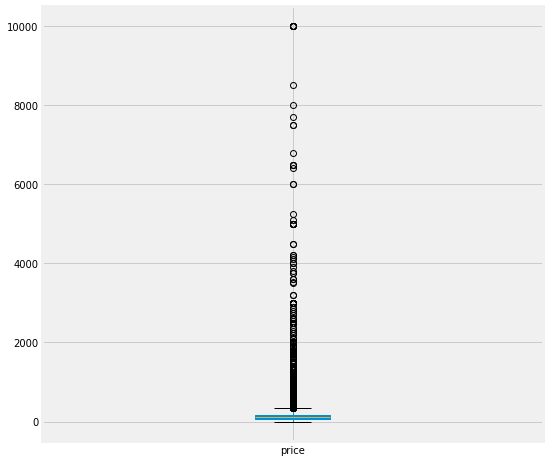

In [8]:
bnb_df['price'].plot(kind='box', patch_artist=True, figsize = (8, 8))
print(bnb_df['price'].describe())

###
This awful looking graph actually tells us quite a bit about the data. The majority of the data is clustered down within a standard deviation of the mean. Above,
there is a large number of outliers, up to the presumable maximum of 10000 dollars.

the following cells split manhattan and brooklyn into their own frames to take a closer look at.

count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64


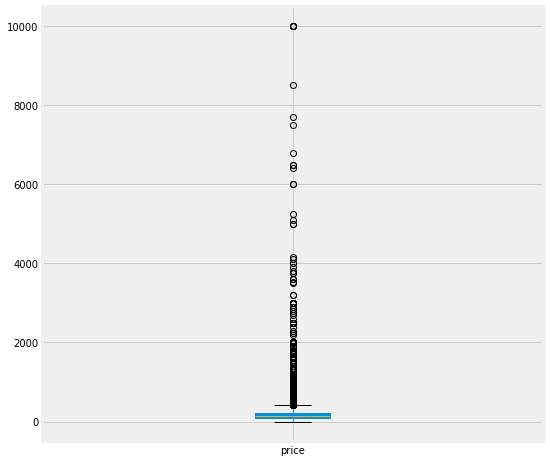

In [9]:
manhattan_df = bnb_df[bnb_df['neighbourhood_group']=='Manhattan']
manhattan_df['price'].plot(kind='box', patch_artist=True, figsize = (8, 8))
print(manhattan_df['price'].describe())

count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64


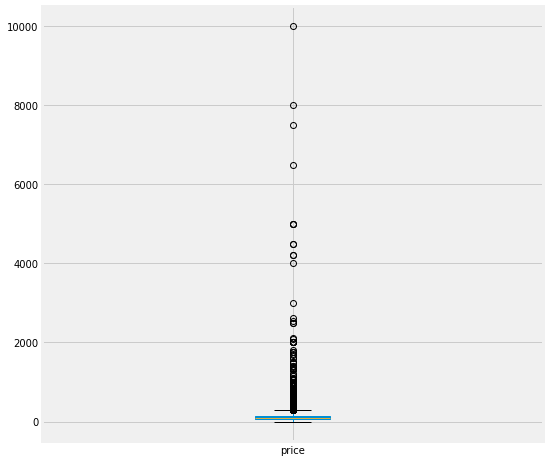

In [10]:
brooklyn_df = bnb_df[bnb_df['neighbourhood_group']=='Brooklyn']
brooklyn_df['price'].plot(kind='box', patch_artist=True, figsize = (8, 8))
print(brooklyn_df['price'].describe())

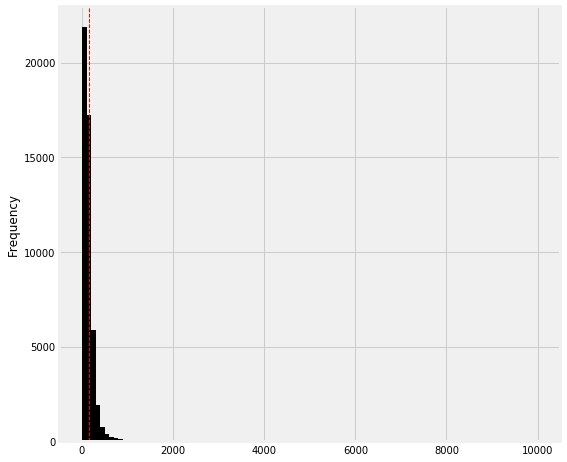

In [11]:
bnb_df['price'].plot(kind='hist', bins=100, figsize = (8, 8), color = 'black')
plt.axvline(bnb_df['price'].mean(), ls='--', lw=1, color='r', )

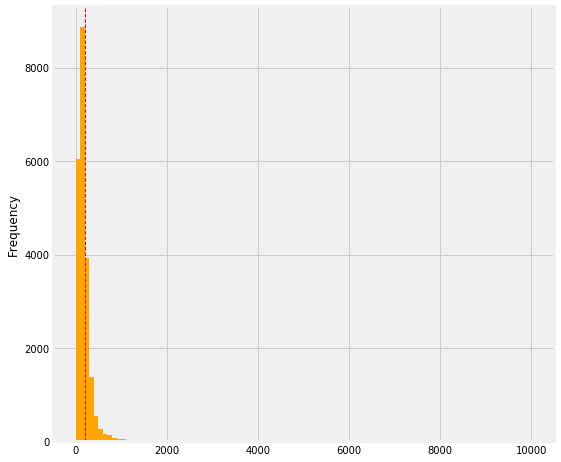

In [12]:
manhattan_df['price'].plot(kind='hist', bins=100, figsize = (8, 8), color = 'orange')
plt.axvline(manhattan_df['price'].mean(), ls='--', lw=1, color='r', )

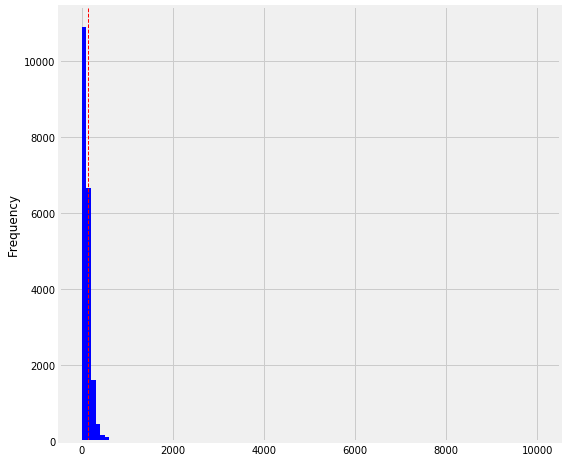

In [13]:
brooklyn_df['price'].plot(kind='hist', bins=100, figsize = (8, 8), color = 'b')
plt.axvline(brooklyn_df['price'].mean(), ls='--', lw=1, color='r', )

## Analysis 2

We see the same pattern repeated in both Manhattan and Brooklyn. Suggesting that for the airbnb market in general there is a strong right skew in the distribution.
That is, while the vast majority of listings are centered around the mean, the outlier values up to 10000 dollars are skewing the data. Therefore some exclusion of those outliers is in order. 

Also of note. All of the dataframes are giving minimum values of 0, suggesting there are rows to be excluded as well for having suspicious values. 

## Data Cleaning

In [14]:
# first let's investigate those rows with a price of 0
bnb_df[bnb_df['price'] == 0].head()


id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  2018-01-06               0.05                               4   
25433  2019-06-24               2.56                               4   
25634  2019-05-18               0.71                               5   
25753  2017-10-27               0.53                               2   
25778  2018-01-02               0.15                               1   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73

In [15]:
print(bnb_df[bnb_df['price'] == 0].shape)

(11, 16)


In [16]:
# they look like legitimate listings with an incorrect price. They also are a relatively small subset of the data, so I feel comfortable excluding them from analysis.
bnb_df = bnb_df[bnb_df['price'] != 0]

In [17]:
# looking at the standard deviations for the above data frames, I believe excluding values above 500 will give us more useful graphs.
outlier_df = bnb_df[bnb_df['price'] > 500]
bnb_df = bnb_df[bnb_df['price'] <= 500]

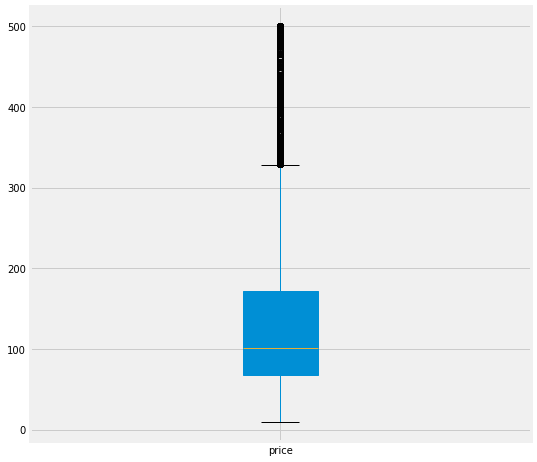

In [18]:
bnb_df['price'].plot(kind='box', patch_artist=True, figsize = (8, 8))

count     1044.000000
mean      1123.954981
std       1176.040609
min        503.000000
25%        600.000000
50%        750.000000
75%       1000.000000
max      10000.000000
Name: price, dtype: float64


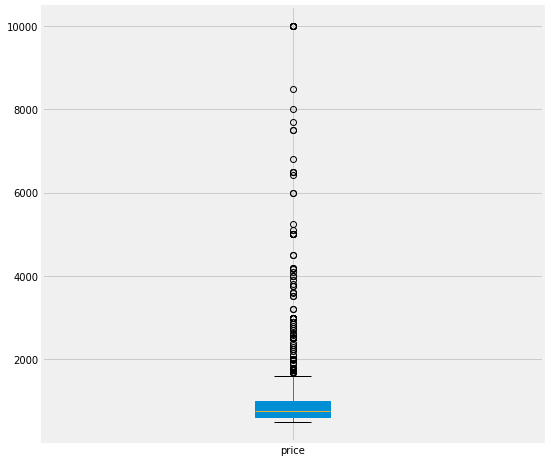

In [19]:
outlier_df['price'].plot(kind='box', patch_artist=True, figsize = (8, 8))
print(outlier_df['price'].describe())

In [20]:
#assigning updated values to brooklyn and manhattan dataframes
brooklyn_df = bnb_df[bnb_df['neighbourhood_group']=='Brooklyn']
manhattan_df = bnb_df[bnb_df['neighbourhood_group']=='Manhattan']

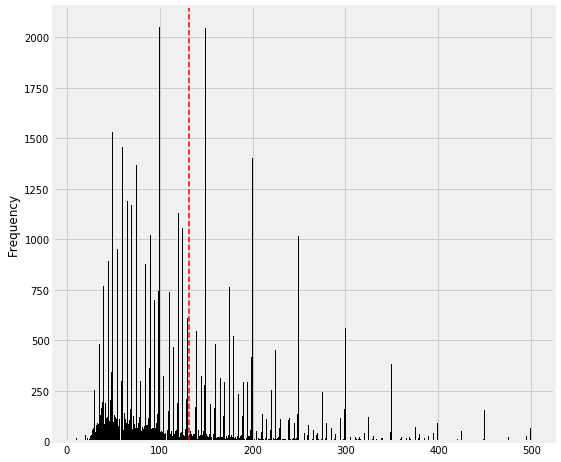

In [21]:
bnb_df['price'].plot(kind='hist', bins=500, figsize = (8, 8), color = 'black')
plt.axvline(bnb_df['price'].mean(), ls='--', lw=1.5, color='r')

Text(141.5608068561873, 3500, 'Mean Price NYC: $131.56')

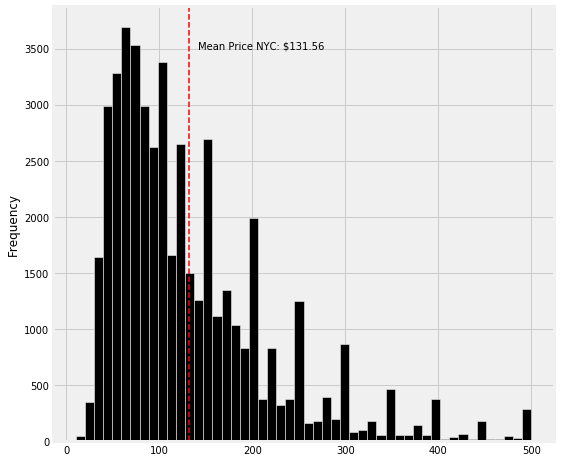

In [22]:
#same information with less granularity, each bin being a 10 dollar increase, rather than 1 dollar increase
bnb_df['price'].plot(kind='hist', bins=50,color = 'black', edgecolor='white', figsize = (8, 8))
plt.axvline(bnb_df['price'].mean(), ls='--', lw=1.5, color='r')
plt.annotate(f"Mean Price NYC: ${round(bnb_df['price'].mean(), 2)}", (bnb_df['price'].mean() + 10, 3500))

Text(151.5608068561873, 1400, 'Mean Price Manhattan: $163.26')

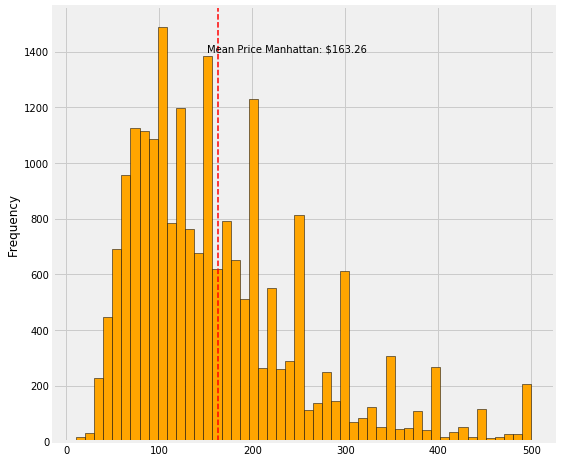

In [23]:
manhattan_df['price'].plot(kind='hist', bins=50, edgecolor='black', figsize=(8,8), color='orange')
plt.axvline(manhattan_df['price'].mean(), ls='--', lw=1.5, color='r')
plt.annotate(f"Mean Price Manhattan: ${round(manhattan_df['price'].mean(), 2)}", (bnb_df['price'].mean() + 20, 1400))

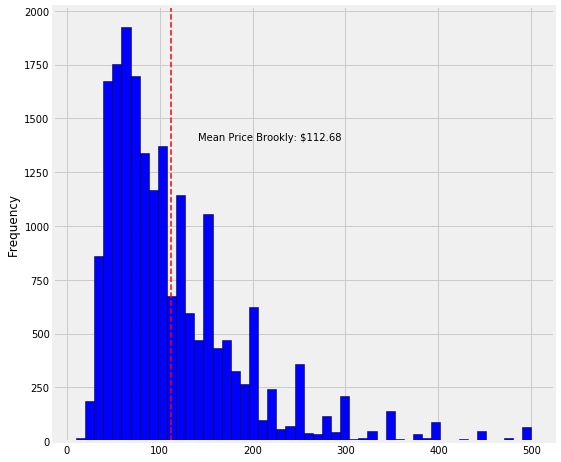

In [24]:
brooklyn_df['price'].plot(kind='hist', bins=50, edgecolor='black', figsize=(8,8), color='b')
plt.axvline(brooklyn_df['price'].mean(), ls='--', lw=1.5, color='r')
plt.annotate(f"Mean Price Brookly: ${round(brooklyn_df['price'].mean(), 2)}", (bnb_df['price'].mean() + 10, 1400))
plt.show()

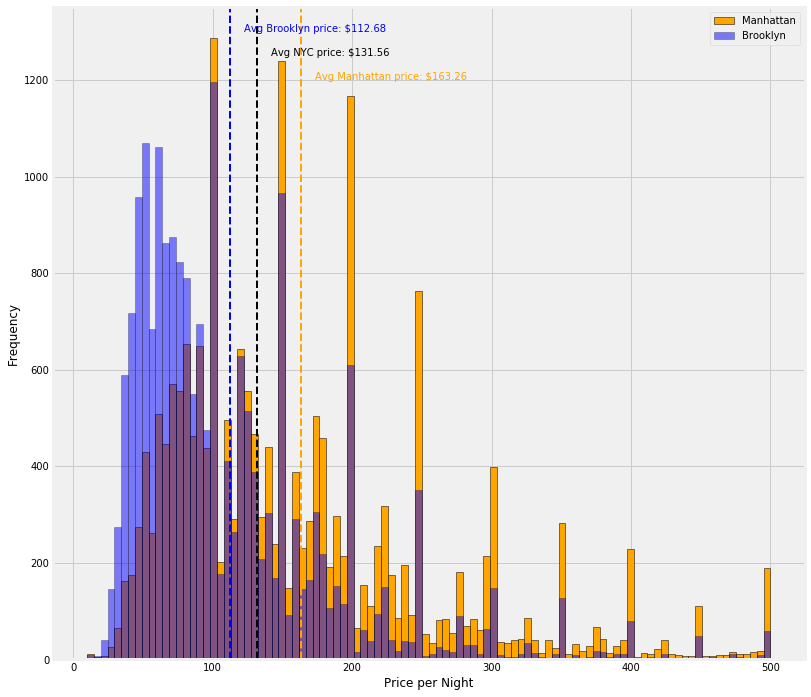

In [25]:
#bringing together the two histograms
# note one thing that is messy about this figure is that is bad data practice is the color signified by the overlap
# of the two histograms is the same, even though beyond $95 dollars, the color refers to Brooklyn, and not Manhattan.
plt.figure(figsize=(12,12))

plt.hist(manhattan_df['price'], bins=100,color='orange', edgecolor='black', label = 'Manhattan', alpha=1)
plt.hist(brooklyn_df['price'], bins=100, color='blue', edgecolor='black', label = 'Brooklyn', alpha=0.5)

plt.axvline(manhattan_df['price'].mean(), ls='--', lw=2, color='orange')
plt.annotate(f'Avg Manhattan price: ${round(manhattan_df["price"].mean(), 2)}', (manhattan_df["price"].mean() + 10, 1200), color = 'orange')
plt.axvline(brooklyn_df['price'].mean(), ls='--', lw=2, color='b')
plt.annotate(f'Avg Brooklyn price: ${round(brooklyn_df["price"].mean(), 2)}', (brooklyn_df["price"].mean() + 10, 1300), color = 'b')
plt.axvline(bnb_df['price'].mean(), ls='--', lw=2, color='black')
plt.annotate(f'Avg NYC price: ${round(bnb_df["price"].mean(), 2)}', (bnb_df['price'].mean() + 10, 1250), color='black')



plt.legend()
plt.xlabel('Price per Night')
plt.ylabel('Frequency')
plt.show()

## Analysis 3
Here we can observe that there is a definite pattern to pricing, regardless of Borough. Under 100 dollars there is a lot of spread, but as price per night increase, the price points focus on prices around the 100s (200, 300, 400, 500) and smaller peaks at the 50s (250, 350, 450)
